In [31]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('train_values.csv')
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  int64   
 2   geo_level_2_id                          260601 non-null  int64   
 3   geo_level_3_id                          260601 non-null  int64   
 4   count_floors_pre_eq                     260601 non-null  int64   
 5   age                                     260601 non-null  int64   
 6   area_percentage                         260601 non-null  int64   
 7   height_percentage                       260601 non-null  int64   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

In [36]:
df2 = pd.read_csv('train_labels.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [37]:
df['land_surface_condition'] = df['land_surface_condition'].astype('category')
df['legal_ownership_status'] = df['legal_ownership_status'].astype('category')
df['land_surface_condition'] = df['land_surface_condition'].astype('category')
df['foundation_type'] = df['foundation_type'].astype('category')
df['roof_type'] = df['roof_type'].astype('category')
df['ground_floor_type'] = df['ground_floor_type'].astype('category')
df['other_floor_type'] = df['other_floor_type'].astype('category')
df['position'] = df['position'].astype('category')
df['plan_configuration'] = df['plan_configuration'].astype('category')

In [38]:
df['has_secondary_use'] = df['has_secondary_use'].astype('bool')
df['has_secondary_use_agriculture'] = df['has_secondary_use_agriculture'].astype('bool')
df['has_secondary_use_hotel'] = df['has_secondary_use_hotel'].astype('bool')
df['has_secondary_use_rental'] = df['has_secondary_use_rental'].astype('bool')
df['has_secondary_use_institution'] = df['has_secondary_use_institution'].astype('bool')
df['has_secondary_use_school'] = df['has_secondary_use_school'].astype('bool')
df['has_secondary_use_industry'] = df['has_secondary_use_industry'].astype('bool')
df['has_secondary_use_health_post'] = df['has_secondary_use_health_post'].astype('bool')
df['has_secondary_use_gov_office'] = df['has_secondary_use_gov_office'].astype('bool')
df['has_secondary_use_use_police'] = df['has_secondary_use_use_police'].astype('bool')
df['has_secondary_use_other'] = df['has_secondary_use_other'].astype('bool')

df['has_superstructure_adobe_mud'] = df['has_superstructure_adobe_mud'].astype('bool')
df['has_superstructure_mud_mortar_stone'] = df['has_superstructure_mud_mortar_stone'].astype('bool')
df['has_superstructure_stone_flag'] = df['has_superstructure_stone_flag'].astype('bool')
df['has_superstructure_cement_mortar_stone'] = df['has_superstructure_cement_mortar_stone'].astype('bool')
df['has_superstructure_mud_mortar_brick'] = df['has_superstructure_mud_mortar_brick'].astype('bool')

df['has_superstructure_cement_mortar_brick'] = df['has_superstructure_cement_mortar_brick'].astype('bool')
df['has_superstructure_timber'] = df['has_superstructure_timber'].astype('bool')
df['has_superstructure_bamboo'] = df['has_superstructure_bamboo'].astype('bool')
df['has_superstructure_rc_non_engineered'] = df['has_superstructure_rc_non_engineered'].astype('bool')
df['has_superstructure_rc_engineered'] = df['has_superstructure_rc_engineered'].astype('bool')
df['has_superstructure_other'] = df['has_superstructure_other'].astype('bool')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  int64   
 2   geo_level_2_id                          260601 non-null  int64   
 3   geo_level_3_id                          260601 non-null  int64   
 4   count_floors_pre_eq                     260601 non-null  int64   
 5   age                                     260601 non-null  int64   
 6   area_percentage                         260601 non-null  int64   
 7   height_percentage                       260601 non-null  int64   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

In [40]:
df = df.merge(df2)
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,False,False,False,False,False,False,False,False,False,3
1,28830,8,900,2812,2,10,8,7,o,r,...,False,False,False,False,False,False,False,False,False,2
2,94947,21,363,8973,2,10,5,5,t,r,...,False,False,False,False,False,False,False,False,False,3
3,590882,22,418,10694,2,10,6,5,t,r,...,False,False,False,False,False,False,False,False,False,2
4,201944,11,131,1488,3,30,8,9,t,r,...,False,False,False,False,False,False,False,False,False,3


In [41]:
df.to_csv('dataset_v1')

### ¿Existe relacion entre la antiguedad de las edificaciones y el nivel de daños registrado a causa del terremoto?

In [42]:
df['age']

0         30
1         10
2         10
3         10
4         30
          ..
260596    55
260597     0
260598    55
260599    10
260600    10
Name: age, Length: 260601, dtype: int64

Text(0.5, 0, 'nivel de daño')

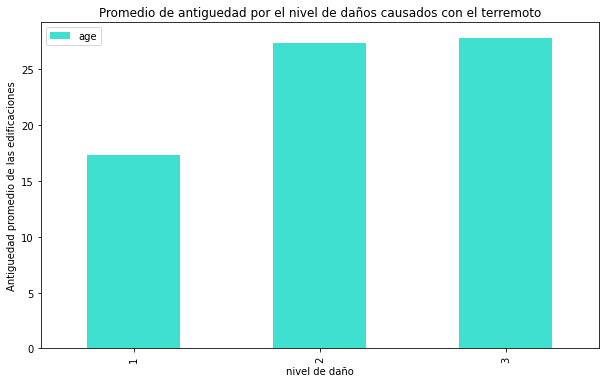

In [43]:
grouped_age=df.groupby(['damage_grade']).agg({'age':'mean'}).plot(kind='bar', title='Promedio de antiguedad por el nivel de daños causados con el terremoto', linewidth=2, figsize=(10,6), color='turquoise');
ax=plt.gca()
ax.set_ylabel('Antiguedad promedio de las edificaciones');
ax.set_xlabel('nivel de daño')

Las edificaciones con menor nivel de daños, tienen en promedio alrededor de 17 años de antigüedad, y efectivamente para los edificios con mayores daños hay un promedio mayor de años de antiguedad. Sin embargo no se observa demasiada diferencia en años entre las edificaciones con daños medios y las con daños graves. Esto puede dar cuenta de otros factores, más allá de la edad interviniendo.

A continuacion creo una nueva columna para el data frame, consistente en la variable de interés, restandole 1 a cada valor. Asi daño leve será 0, daño medio será 1 y daño grave será 0

In [65]:
df['damage_grade_b']=df['damage_grade']-1
df['damage_grade_b'].describe()

count    260601.000000
mean          1.238272
std           0.611814
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: damage_grade_b, dtype: float64

Text(0.5, 0, 'Condicion de la superficie de la construccion')

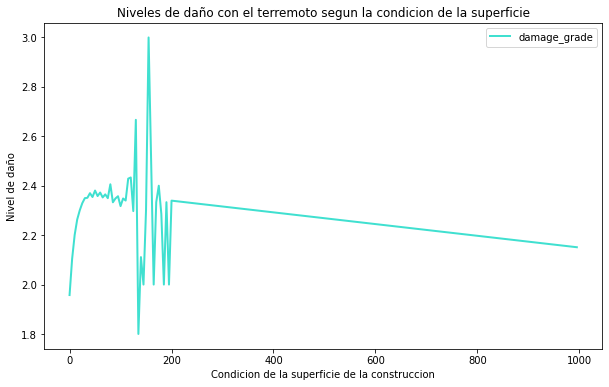

In [64]:
grouped_age=df.groupby(['age']).agg({'damage_grade':'mean'}).plot(kind='line', title='Niveles de daño con el terremoto segun la condicion de la superficie', linewidth=2, figsize=(10,6), color='turquoise');
ax=plt.gca()
ax.set_ylabel('Nivel de daño');
ax.set_xlabel('Antiguedad en años de la construccion')

Text(0.5, 0, 'Antiguedad en años de la construccion')

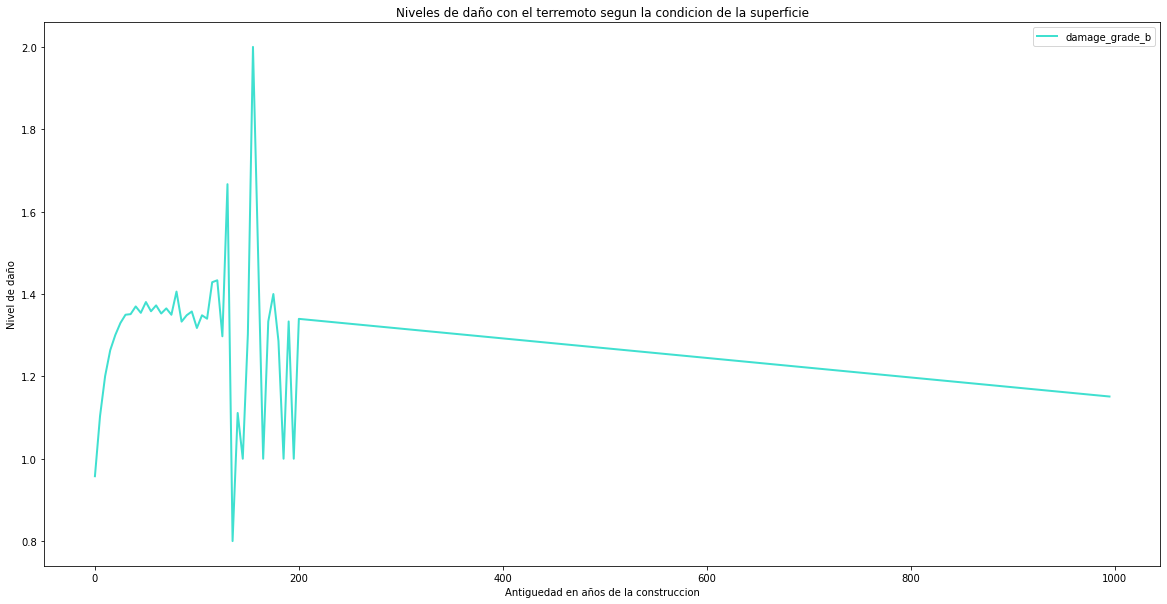

In [72]:
grouped_age=df.groupby(['age']).agg({'damage_grade_b':'mean'}).plot(kind='line', title='Niveles de daño con el terremoto segun la condicion de la superficie', linewidth=2, figsize=(20,10), color='turquoise');
ax=plt.gca()
ax.set_ylabel('Nivel de daño');
ax.set_xlabel('Antiguedad en años de la construccion')

Aparentemente los edificios muy nuevos son los que tuvieron menor grado de daño. El Nivel de daño aumenta de manera continua hasta los primeros 40 años de antiguedad aproximadamente, luego se experimenta un descenso irregular del grado de daño, pero pasando los 100 años se producen tendencias muy radicales y distintas en cuanto a las consecuencias que dejó el sismo, por lo cual no aventuraría una interpretación al respecto.

In [44]:
df_entero=df[['geo_level_1_id','geo_level_2_id','geo_level_3_id','count_floors_pre_eq','height_percentage','area_percentage','count_families','age']]
df_entero

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,height_percentage,area_percentage,count_families,age
0,6,487,12198,2,5,6,1,30
1,8,900,2812,2,7,8,1,10
2,21,363,8973,2,5,5,1,10
3,22,418,10694,2,5,6,1,10
4,11,131,1488,3,9,8,1,30
...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,3,6,1,55
260597,17,715,2060,2,5,6,1,0
260598,17,51,8163,3,7,6,1,55
260599,26,39,1851,2,6,14,1,10


In [45]:
df_entero['height_percentage'].describe()

count    260601.000000
mean          5.434365
std           1.918418
min           2.000000
25%           4.000000
50%           5.000000
75%           6.000000
max          32.000000
Name: height_percentage, dtype: float64

In [46]:
df_entero['area_percentage'].describe()

count    260601.000000
mean          8.018051
std           4.392231
min           1.000000
25%           5.000000
50%           7.000000
75%           9.000000
max         100.000000
Name: area_percentage, dtype: float64

In [47]:
df_int_escalado_simple=pd.DataFrame()

In [48]:
df_int_escalado_simple['count_floors_pre_eq']=df_entero['count_floors_pre_eq']/df_entero['count_floors_pre_eq'].max()
df_int_escalado_simple['height_percentage']=df_entero['height_percentage']/df_entero['height_percentage'].max()
df_int_escalado_simple['area_percentage']=df_entero['area_percentage']/100
df_int_escalado_simple['count_families']=df_entero['count_families']/df_entero['count_families'].max()
df_int_escalado_simple['age']=df_entero['age']/df_entero['age'].max()
df_int_escalado_simple

,count_floors_pre_eq,height_percentage,area_percentage,count_families,age
0,0.222222,0.15625,0.06,0.111111,0.030151
1,0.222222,0.21875,0.08,0.111111,0.010050
2,0.222222,0.15625,0.05,0.111111,0.010050
3,0.222222,0.15625,0.06,0.111111,0.010050
4,0.333333,0.28125,0.08,0.111111,0.030151
...,...,...,...,...,...
260596,0.111111,0.09375,0.06,0.111111,0.055276
260597,0.222222,0.15625,0.06,0.111111,0.000000
260598,0.333333,0.21875,0.06,0.111111,0.055276
260599,0.222222,0.18750,0.14,0.111111,0.010050


c:\users\patricio\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


Text(0.5, 1.0, 'Análsis de correlación de los datos numéricos')

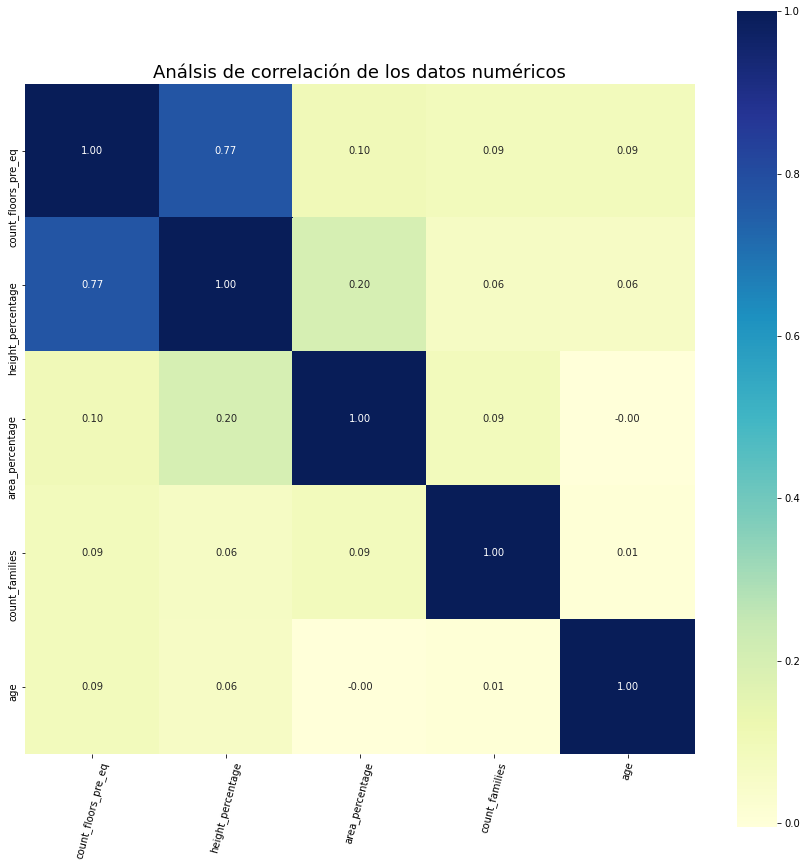

In [49]:
plt.figure(figsize=(15, 15))
titulo='Análsis de correlación de los datos numéricos'

sns.heatmap(df_int_escalado_simple.corr(), square=True, annot=True, fmt='.2f', cmap="YlGnBu");
plt.xticks(rotation=75)
plt.title(titulo,fontSize=18)


In [50]:
df_int_minimo_maximo=pd.DataFrame()

In [52]:
df_int_minimo_maximo['count_floors_pre_eq']=(df_entero['count_floors_pre_eq']-df_entero['count_floors_pre_eq'].min())/(df_entero['count_floors_pre_eq'].max()-df_entero['count_floors_pre_eq'].min())
df_int_minimo_maximo['height_percentage']=(df_entero['height_percentage']-df_entero['height_percentage'].min())/(df_entero['height_percentage'].max()-df_entero['height_percentage'].min())
df_int_minimo_maximo['area_percentage']=(df_entero['area_percentage']-df_entero['area_percentage'].min())/(df_entero['area_percentage'].max()-df_entero['area_percentage'].min())
df_int_minimo_maximo['count_families']=(df_entero['count_families']-df_entero['count_families'].min())/(df_entero['count_families'].max()-df_entero['count_families'].min())
df_int_minimo_maximo['age']=(df_entero['age']-df_entero['age'].min())/(df_entero['age'].max()-df_entero['age'].min())
df_int_minimo_maximo

,count_floors_pre_eq,height_percentage,area_percentage,count_families,age
0,0.125,0.100000,0.050505,0.111111,0.030151
1,0.125,0.166667,0.070707,0.111111,0.010050
2,0.125,0.100000,0.040404,0.111111,0.010050
3,0.125,0.100000,0.050505,0.111111,0.010050
4,0.250,0.233333,0.070707,0.111111,0.030151
...,...,...,...,...,...
260596,0.000,0.033333,0.050505,0.111111,0.055276
260597,0.125,0.100000,0.050505,0.111111,0.000000
260598,0.250,0.166667,0.050505,0.111111,0.055276
260599,0.125,0.133333,0.131313,0.111111,0.010050


c:\users\patricio\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


Text(0.5, 1.0, 'Análsis de correlación de los datos numéricos')

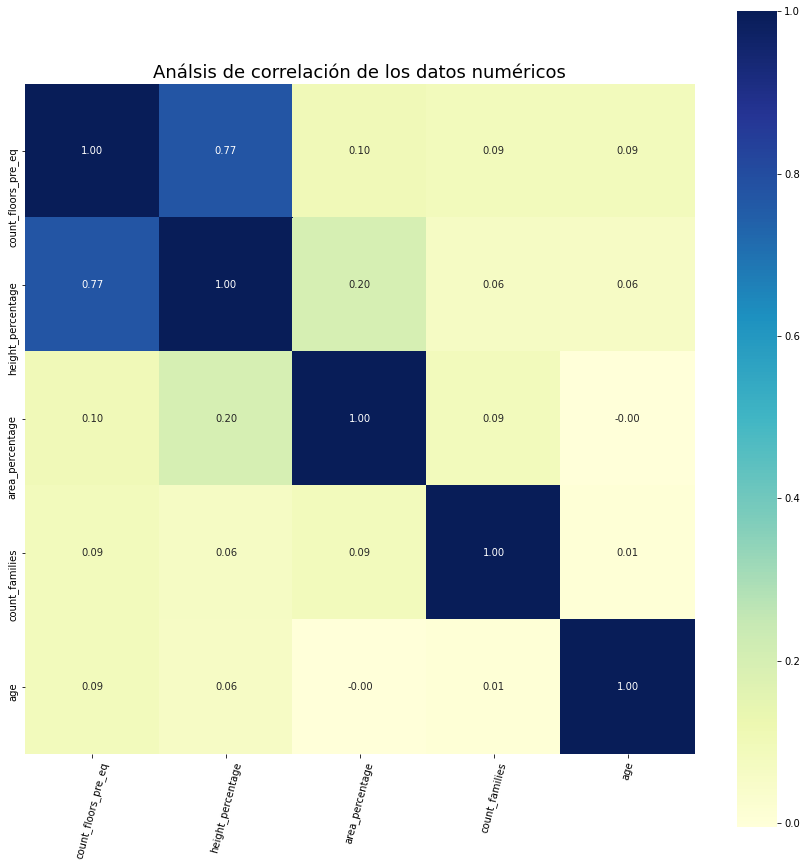

In [53]:
plt.figure(figsize=(15, 15))
titulo='Análsis de correlación de los datos numéricos'

sns.heatmap(df_int_minimo_maximo.corr(), square=True, annot=True, fmt='.2f', cmap="YlGnBu");
plt.xticks(rotation=75)
plt.title(titulo,fontSize=18)


In [54]:
df_int_z_score=pd.DataFrame()

In [56]:
df_int_z_score['count_floors_pre_eq']=(df_entero['count_floors_pre_eq']-df_entero['count_floors_pre_eq'].mean())/df_entero['count_floors_pre_eq'].std()
df_int_z_score['height_percentage']=(df_entero['height_percentage']-df_entero['height_percentage'].mean())/df_entero['height_percentage'].std()
df_int_z_score['area_percentage']=(df_entero['area_percentage']-df_entero['area_percentage'].mean())/df_entero['area_percentage'].std()
df_int_z_score['count_families']=(df_entero['count_families']-df_entero['count_families'].mean())/df_entero['count_families'].std()
df_int_z_score['age']=(df_entero['age']-df_entero['age'].mean())/df_entero['age'].std()
df_int_z_score

,count_floors_pre_eq,height_percentage,area_percentage,count_families,age
0,-0.178273,-0.226418,-0.459459,0.038365,0.047100
1,-0.178273,0.816107,-0.004110,0.038365,-0.224765
2,-0.178273,-0.226418,-0.687134,0.038365,-0.224765
3,-0.178273,-0.226418,-0.459459,0.038365,-0.224765
4,1.195986,1.858633,-0.004110,0.038365,0.047100
...,...,...,...,...,...
260596,-1.552533,-1.268944,-0.459459,0.038365,0.386931
260597,-0.178273,-0.226418,-0.459459,0.038365,-0.360697
260598,1.195986,0.816107,-0.459459,0.038365,0.386931
260599,-0.178273,0.294844,1.361939,0.038365,-0.224765


c:\users\patricio\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


Text(0.5, 1.0, 'Análsis de correlación de los datos numéricos')

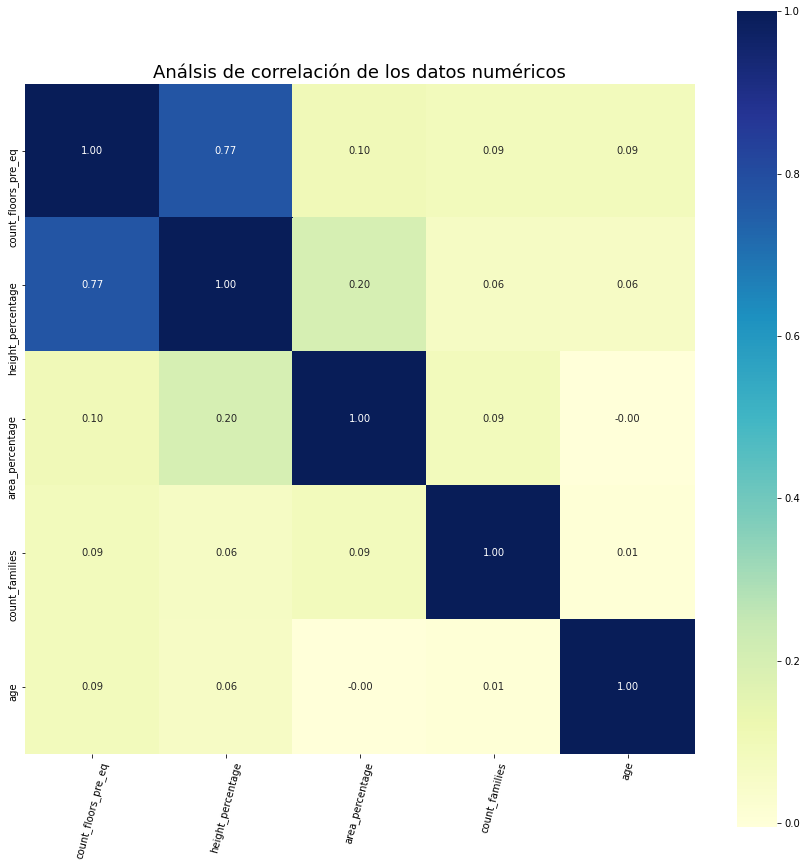

In [57]:
plt.figure(figsize=(15, 15))
titulo='Análsis de correlación de los datos numéricos'

sns.heatmap(df_int_z_score.corr(), square=True, annot=True, fmt='.2f', cmap="YlGnBu");
plt.xticks(rotation=75)
plt.title(titulo,fontSize=18)

### ¿Habrá ciertos tipos de condiciones de la superficie terrestre en que los edificios fueron construidos, asociadas a los niveles de daño registrados en estos?

Hipótesis: “Parece razonable que distintas condiciones en el suelo de la edificación haya contribuido a resistir mejor o peor a la catástrofe”

Text(0.5, 0, 'Condicion de la superficie de la construccion')

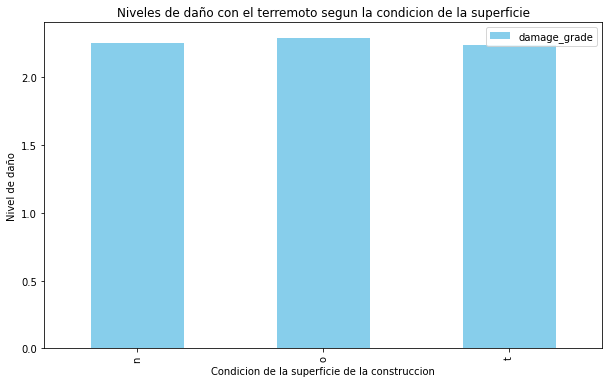

In [76]:
grouped_age=df.groupby(['land_surface_condition']).agg({'damage_grade':'mean'}).plot(kind='bar', title='Niveles de daño con el terremoto segun la condicion de la superficie', linewidth=2, figsize=(10,6), color='skyblue');
ax=plt.gca()
ax.set_ylabel('Nivel de daño');
ax.set_xlabel('Condicion de la superficie de la construccion')

Text(0.5, 0, 'Condicion de la superficie de la construccion')

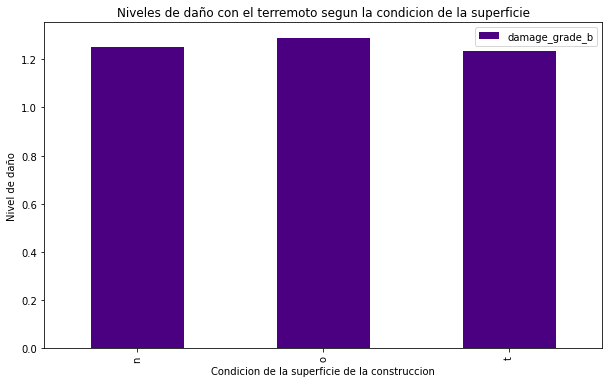

In [77]:
grouped_age=df.groupby(['land_surface_condition']).agg({'damage_grade_b':'mean'}).plot(kind='bar', title='Niveles de daño con el terremoto segun la condicion de la superficie', linewidth=2, figsize=(10,6), color='indigo');
ax=plt.gca()
ax.set_ylabel('Nivel de daño');
ax.set_xlabel('Condicion de la superficie de la construccion')

Text(0.5, 0, 'Nivel de daño')

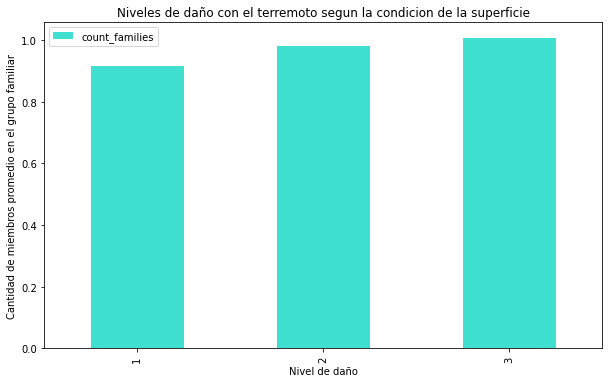

In [73]:
grouped_count_families=df.groupby(['damage_grade']).agg({'count_families':'mean'}).plot(kind='bar', title='Niveles de daño con el terremoto segun la condicion de la superficie', linewidth=2, figsize=(10,6), color='turquoise');
ax=plt.gca()
ax.set_ylabel('Cantidad de miembros promedio en el grupo familiar');
ax.set_xlabel('Nivel de daño')

In [74]:
df['count_families'].value_counts()

1    226115
0     20862
2     11294
3      1802
4       389
5       104
6        22
7         7
9         4
8         2
Name: count_families, dtype: int64

Text(0.5, 0, 'Nivel de daño')

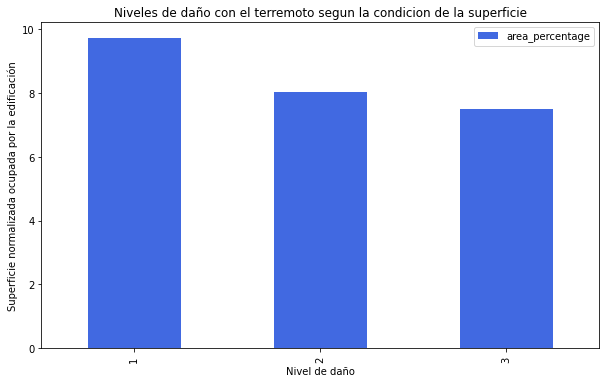

In [88]:
grouped_count_families=df.groupby(['damage_grade']).agg({'area_percentage':'mean'}).plot(kind='bar', title='Niveles de daño con el terremoto segun la condicion de la superficie', linewidth=2, figsize=(10,6), color='royalblue');
ax=plt.gca()
ax.set_ylabel('Superficie normalizada ocupada por la edificación');
ax.set_xlabel('Nivel de daño')

Existe una relacion inversa, no tan marcada entre area y gravedad de daños con el terremoto. Los niveles mas leves de daño están asociados con areas más amplias, y a la inversa los niveles más graves de daño se asocian a areas en promedio más reducidas.